In [1]:
! pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.4/1.4 MB 2.7 MB/s eta 0:00:00


In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


data={
    'age':['youth','youth','middle','senior','senior','senior','middle','youth','youth','senior','youth','middle','middle','senior'],
    'income':['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
    'student':['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
    'credit rating':['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
    'buys computer':['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']
}
df=pd.DataFrame(data)
print(df)
le_age=LabelEncoder()
le_income=LabelEncoder()
le_student=LabelEncoder()
le_credit=LabelEncoder()
le_label=LabelEncoder()

df['age_encoded']=le_age.fit_transform(df['age'])
df['income_encoded']=le_income.fit_transform(df['income'])
df['student_encoded']=le_student.fit_transform(df['student'])
df['credit_encoded']=le_credit.fit_transform(df['credit rating'])
df['buys_computer_encoded']=le_label.fit_transform(df['buys computer'])


       age  income student credit rating buys computer
0    youth    high      no          fair            no
1    youth    high      no     excellent            no
2   middle    high      no          fair           yes
3   senior  medium      no          fair           yes
4   senior     low     yes          fair           yes
5   senior     low     yes     excellent            no
6   middle     low     yes     excellent           yes
7    youth  medium      no          fair            no
8    youth     low     yes          fair           yes
9   senior  medium     yes          fair           yes
10   youth  medium     yes     excellent           yes
11  middle  medium      no     excellent           yes
12  middle    high     yes          fair           yes
13  senior  medium      no     excellent            no


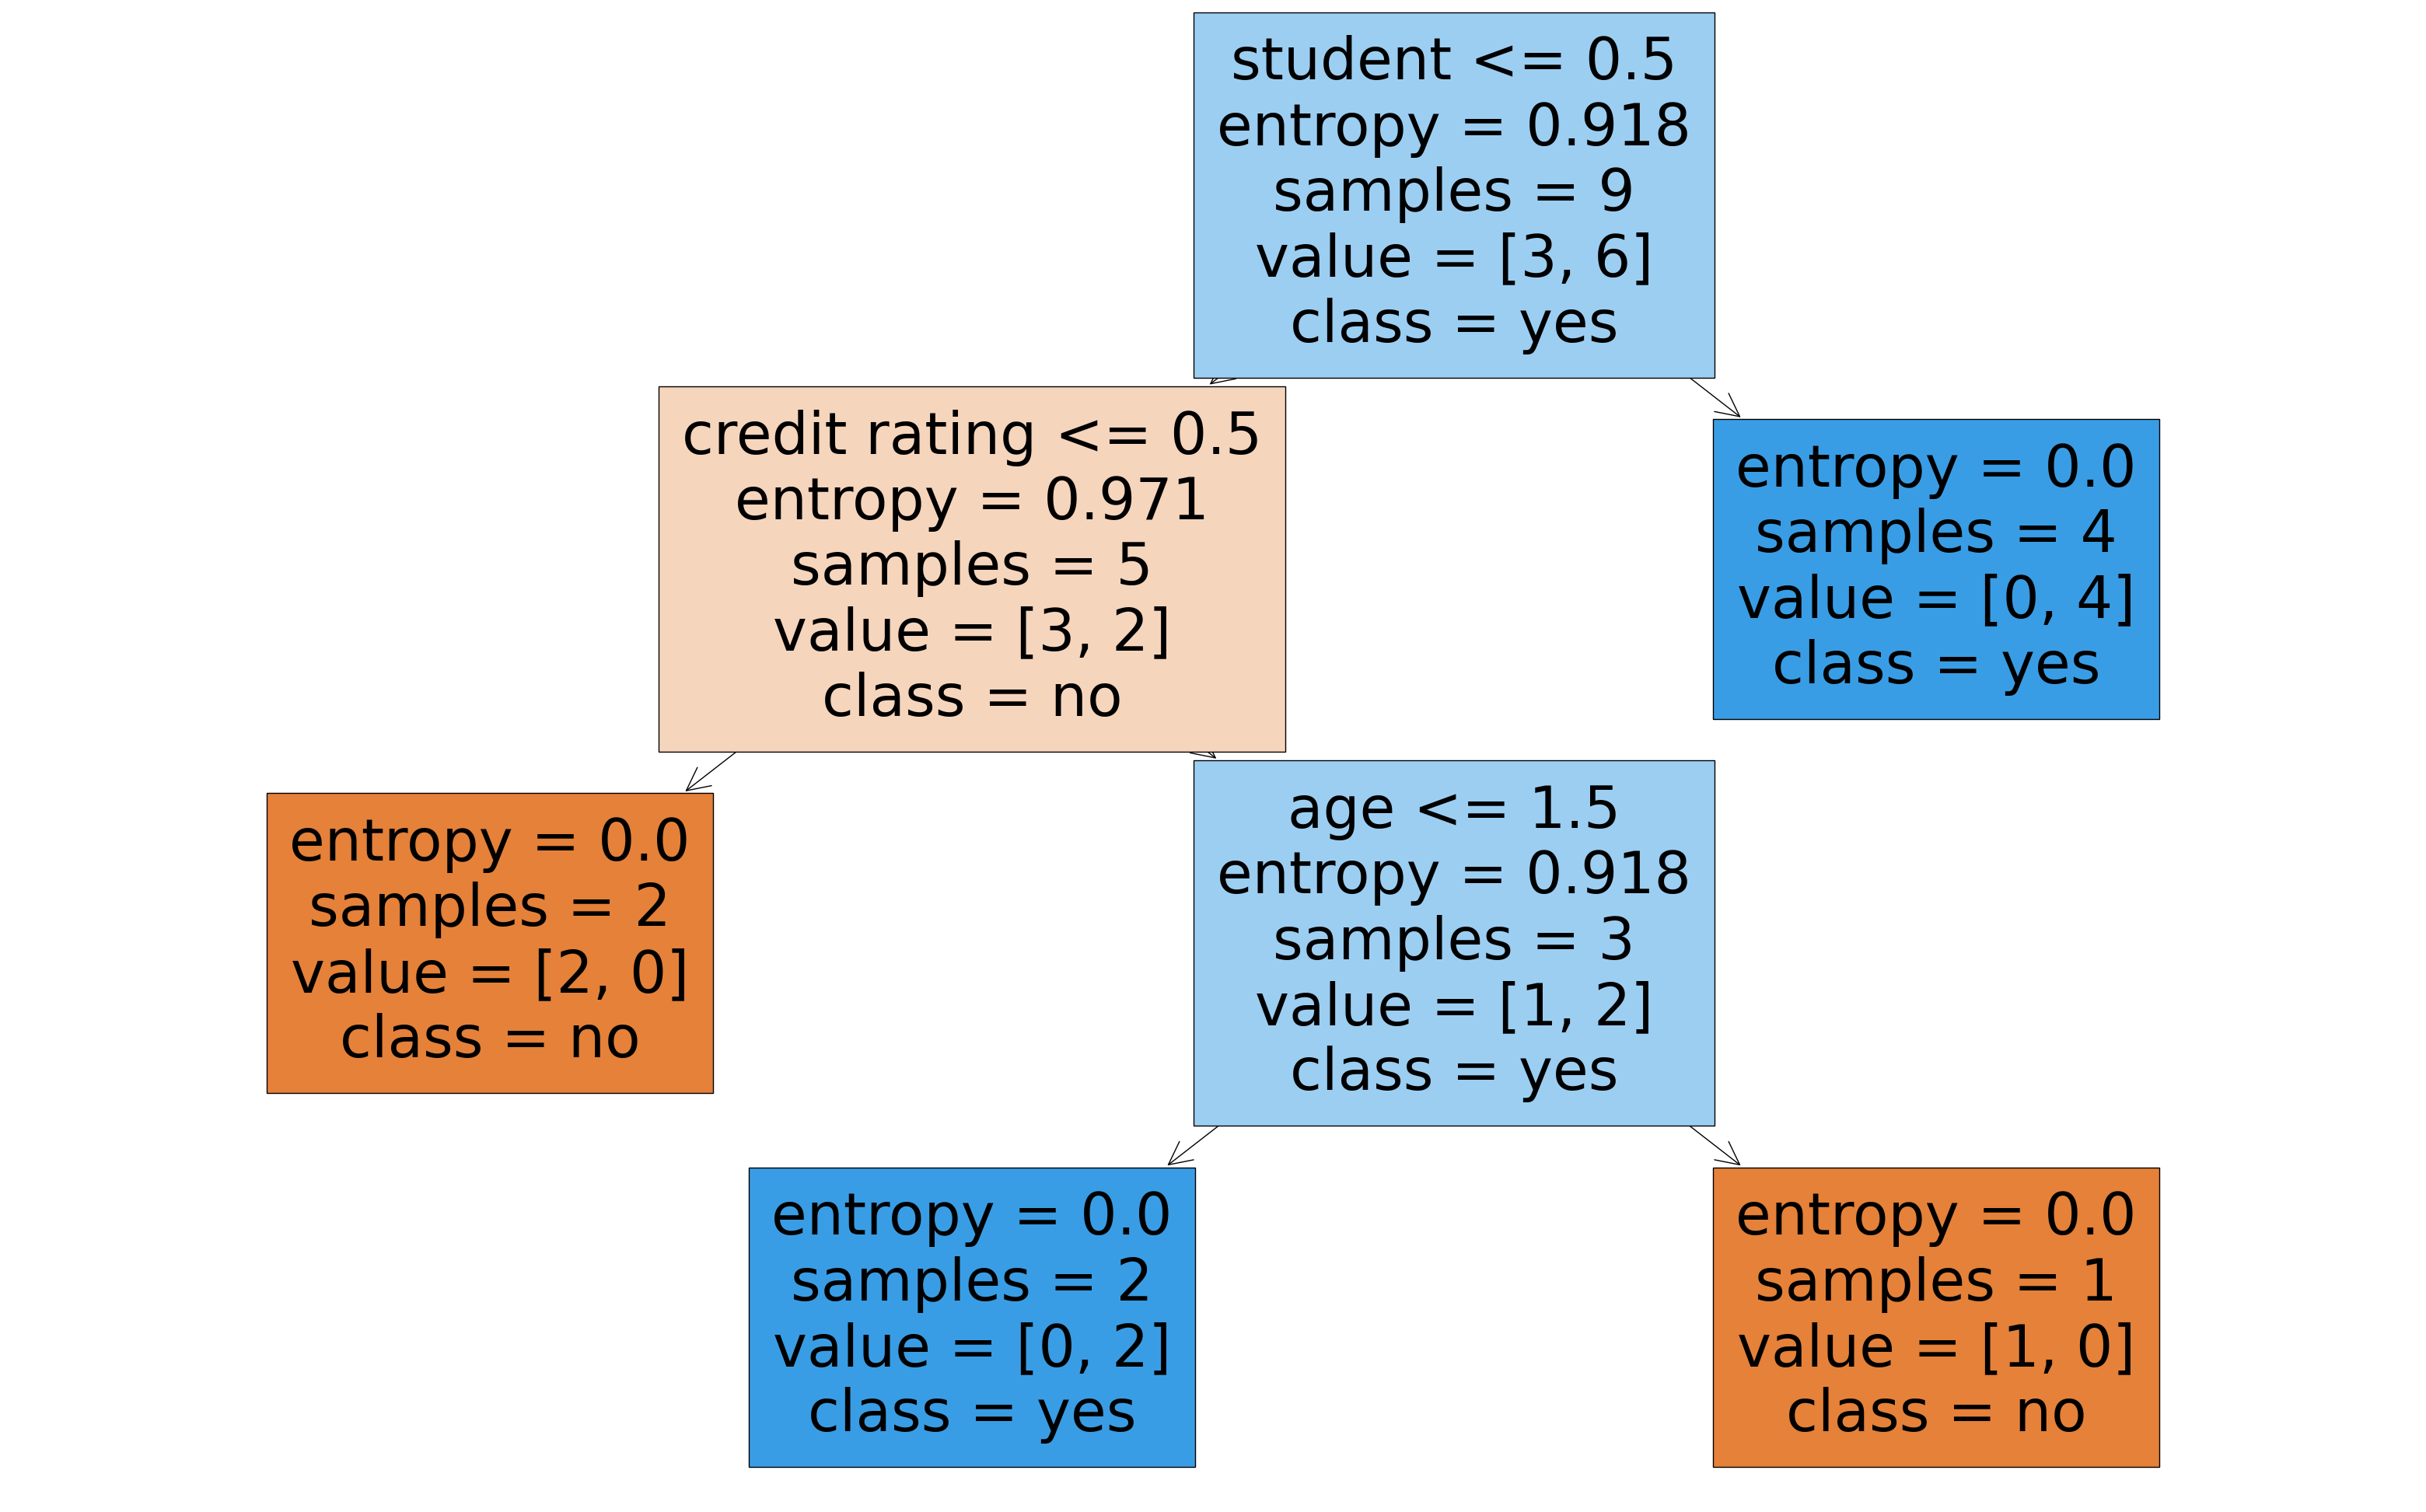

In [47]:
X = df[['age_encoded', 'income_encoded', 'student_encoded', 'credit_encoded']]
y = df['buys_computer_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(40,25))
plot_tree(clf,
          feature_names=['age', 'income', 'student', 'credit rating'],
          class_names=le_label.classes_,
          filled=True)
plt.show()


In [45]:
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

tree_rules= export_text(clf,
          feature_names=['age', 'income', 'student', 'credit rating'])

print("Decision Tree Rules\n", tree_rules)

Decision Tree Rules
 |--- age <= 0.50
|   |--- class: 1
|--- age >  0.50
|   |--- student <= 0.50
|   |   |--- age <= 1.50
|   |   |   |--- credit rating <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- credit rating >  0.50
|   |   |   |   |--- class: 1
|   |   |--- age >  1.50
|   |   |   |--- class: 0
|   |--- student >  0.50
|   |   |--- credit rating <= 0.50
|   |   |   |--- income <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- income >  1.50
|   |   |   |   |--- class: 1
|   |   |--- credit rating >  0.50
|   |   |   |--- class: 1



In [46]:
pip show mlxtend

Name: mlxtend
Version: 0.23.1
Summary: Machine Learning Library Extensions
Home-page: 
Author: 
Author-email: Sebastian Raschka <mail@sebastianraschka.com>
License: BSD 3-Clause
Location: c:\users\temp.it-cirrus.000\appdata\roaming\python\python310\site-packages
Requires: joblib, matplotlib, numpy, pandas, scikit-learn, scipy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [49]:
y_pred = clf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



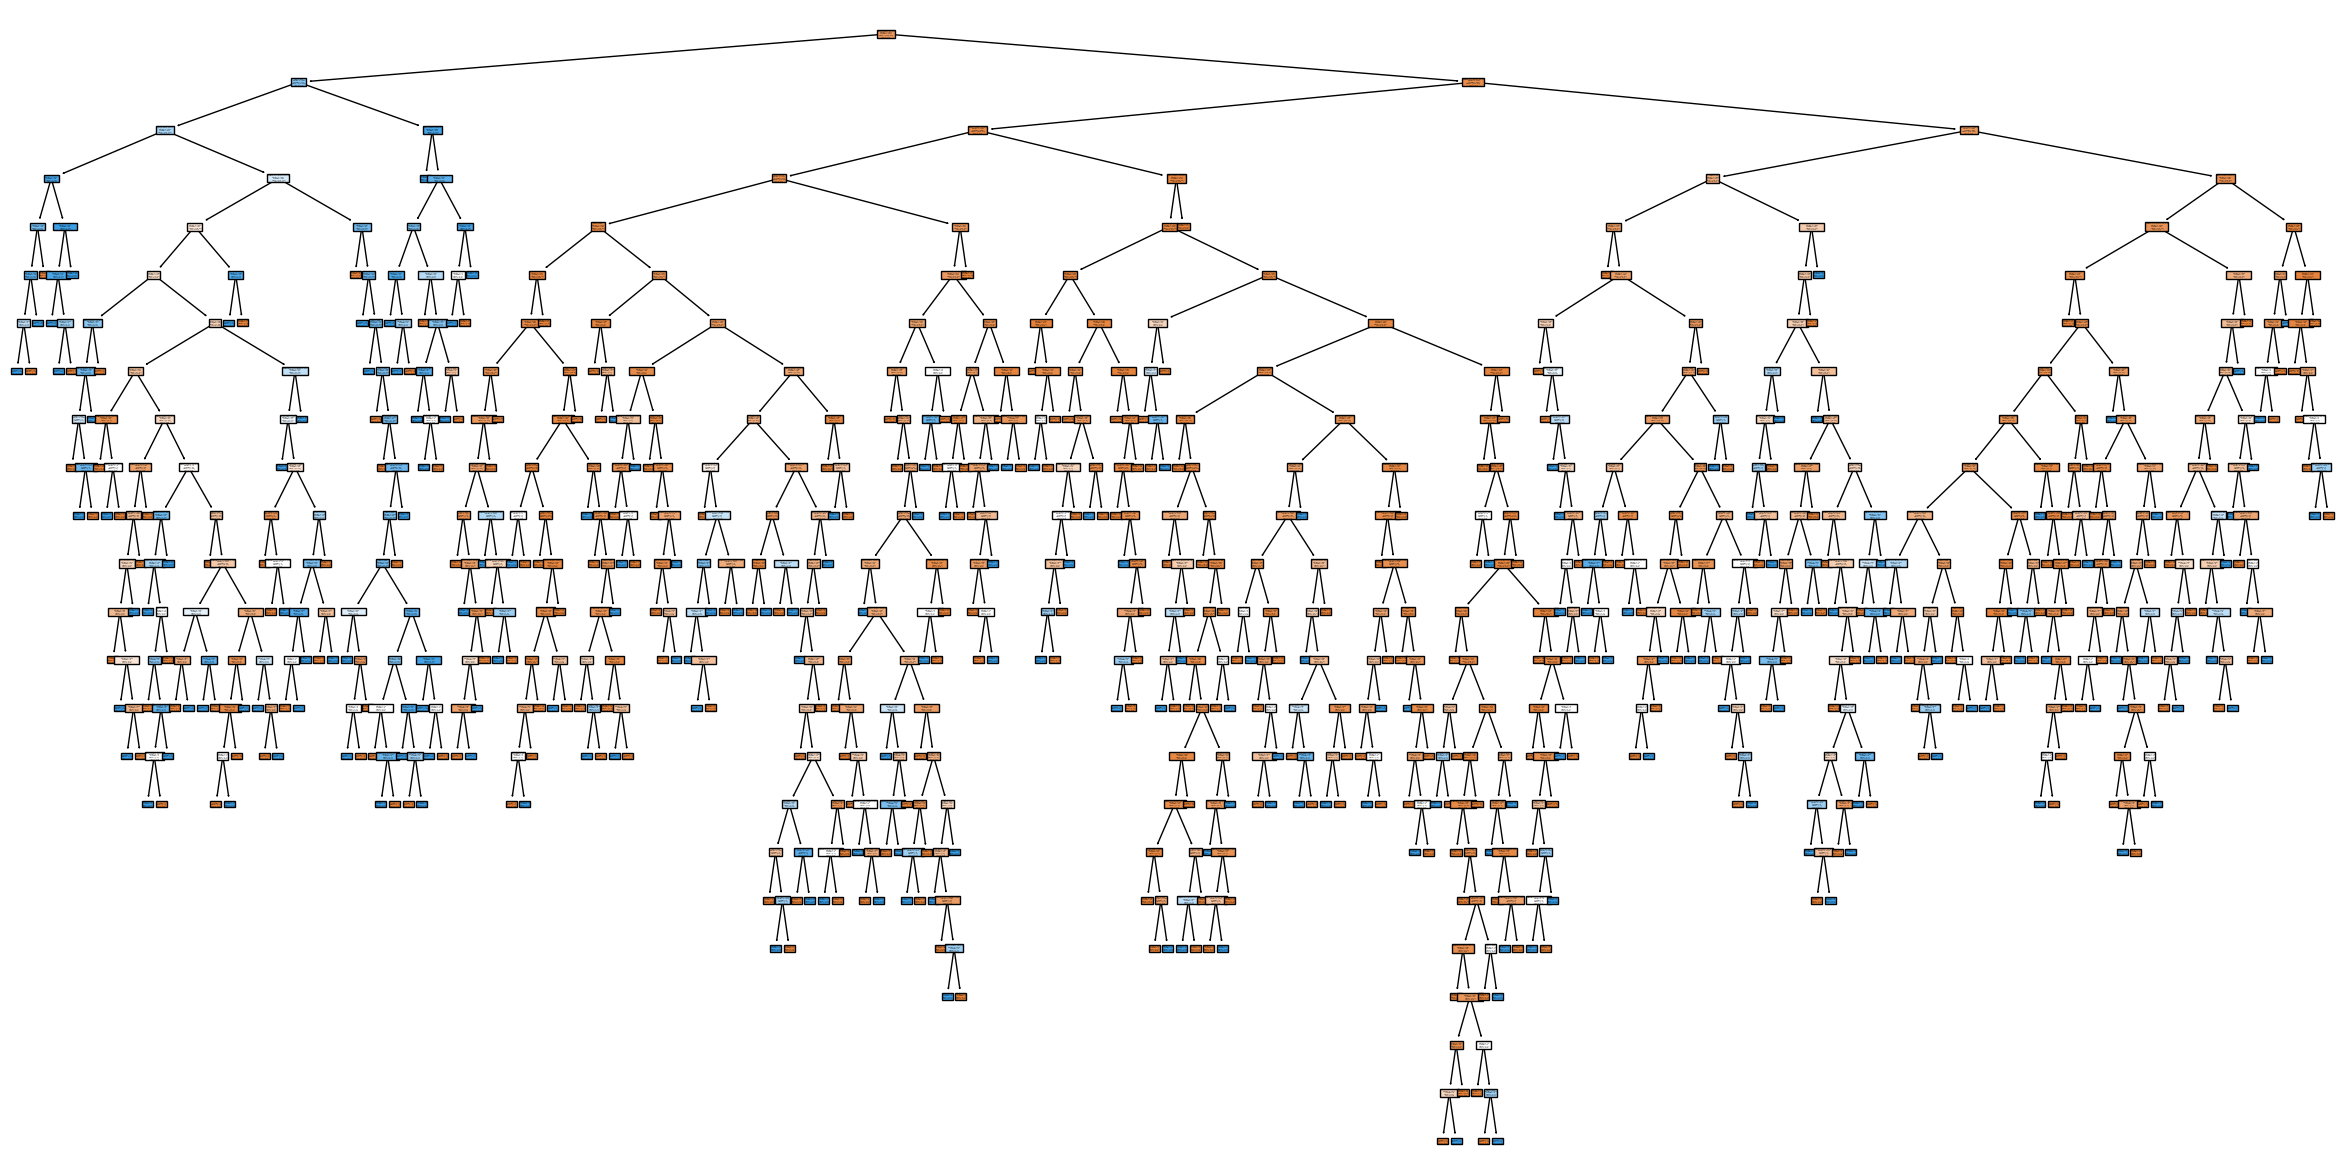

In [52]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
file_path = r"C:\Users\TEMP.IT-CIRRUS.000\Desktop\.ipynb_checkpoints\Breast_Cancer.csv"
data = pd.read_csv(file_path)
le = LabelEncoder()
data_encoded = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
X = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)
plt.figure(figsize=(30, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True)
plt.show()

In [57]:

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
file_path = r"C:\Users\TEMP.IT-CIRRUS.000\Desktop\.ipynb_checkpoints\data.csv"
data = pd.read_csv(file_path)
print(data)
le = LabelEncoder()
data_encoded = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)
ab = data_encoded.iloc[:, :-1]
cd= data_encoded.iloc[:, -1]
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(ab , cd)
plt.figure(figsize=(30, 15))
plot_tree(clf,
          feature_names=X.columns,
          class_names=le.classes_,
          filled=True)
plt.show()

     Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target
0     1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...                                                             

ValueError: at least one array or dtype is required